In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def plot_metrics_from_csv(filename, class_mapping, class_number):
    # Load CSV file into a DataFrame
    df = pd.read_csv(filename)

    # Plot threshold vs precision, recall, and f_score
    plt.figure(figsize=(10, 6))
    plt.plot(df['threshold'], df['precision'], label='Precision')
    plt.plot(df['threshold'], df['recall'], label='Recall')
    plt.plot(df['threshold'], df['f_score'], label='F-score')

    # Add labels and legend
    plt.xlabel('Threshold')
    plt.ylabel('Metrics')
    
    # Map the class number to its corresponding label for the title
    title_class = next(key for key, value in class_mapping.items() if value == class_number)
    plt.title(f'{title_class}: Threshold vs Precision, Recall, and F-score')

    plt.legend()

    # Show the plot
    plt.show()

In [3]:
# Define the mapping
class_mapping = {
    'CTCF Binding Site': 0,
    'Enhancer': 1,
    'Open chromatin': 2,
    'Promoter': 3,
    'TF binding': 4,
    'not_regulatory': 5
}


In [4]:
base_directory = "/home/marina/CNN3_results_200_batch_64_kernel_12_node_1_test_results"

In [5]:
# Define the mapping
class_mapping = {
    'CTCF Binding Site': 0,
    'Enhancer': 1,
    'Open chromatin': 2,
    'Promoter': 3,
    'TF binding': 4,
    'not_regulatory': 5
}

# Model's results

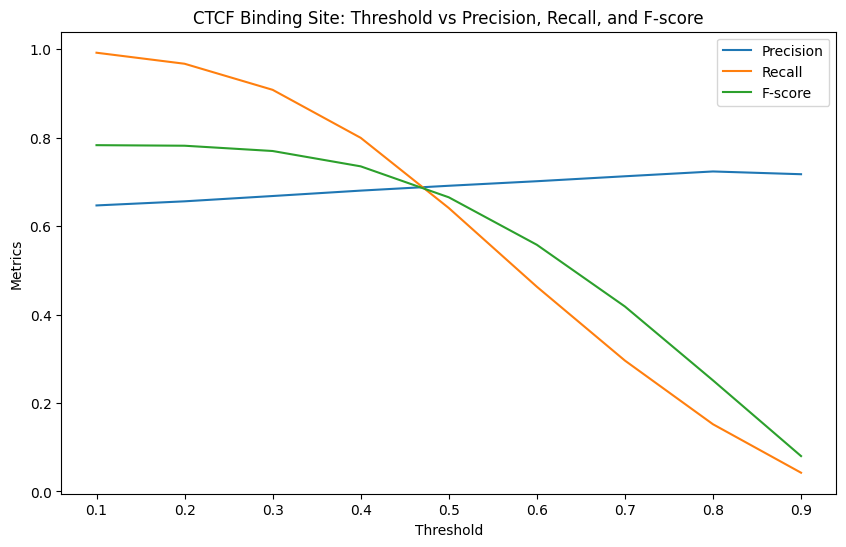

In [6]:
# Example usage
filename = os.path.join(base_directory,'0_results.csv') 
class_number = 0
plot_metrics_from_csv(filename, class_mapping, class_number)

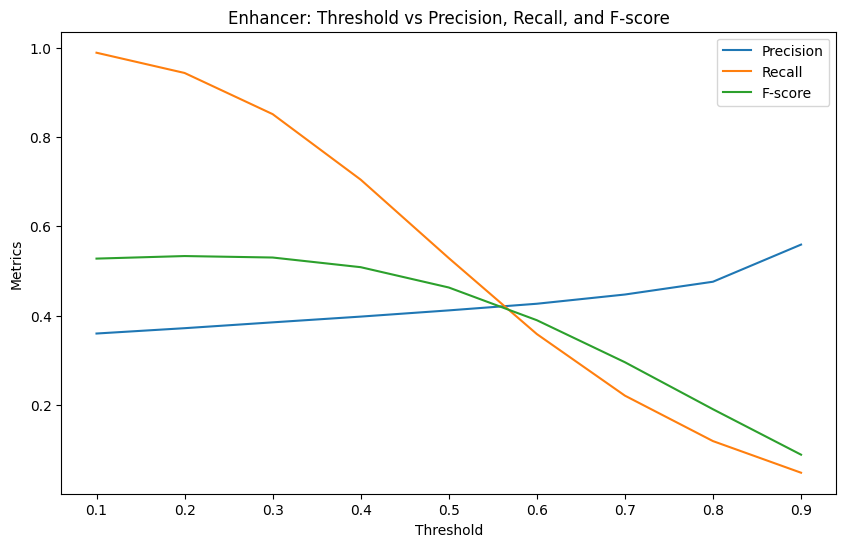

In [7]:
filename = os.path.join(base_directory,'1_results.csv') 
class_number = 1
plot_metrics_from_csv(filename, class_mapping, class_number)

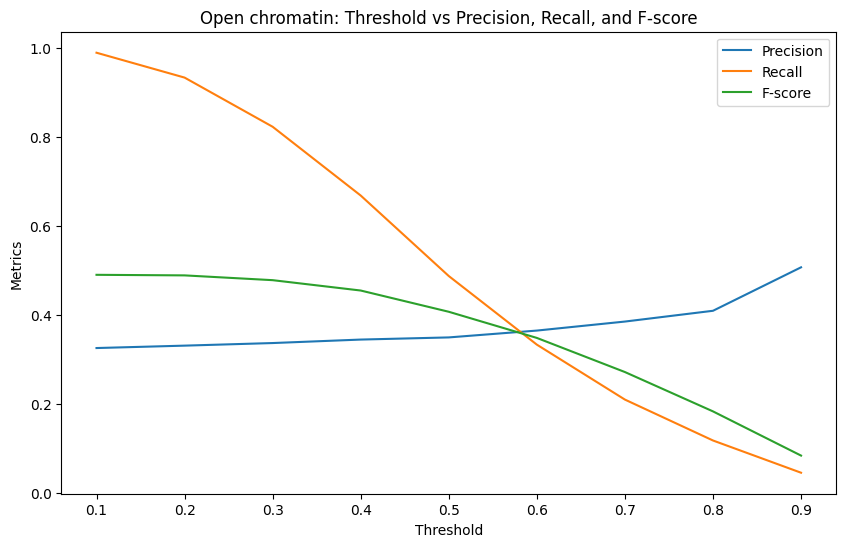

In [8]:
filename = os.path.join(base_directory,'2_results.csv') 
class_number = 2
plot_metrics_from_csv(filename, class_mapping, class_number)

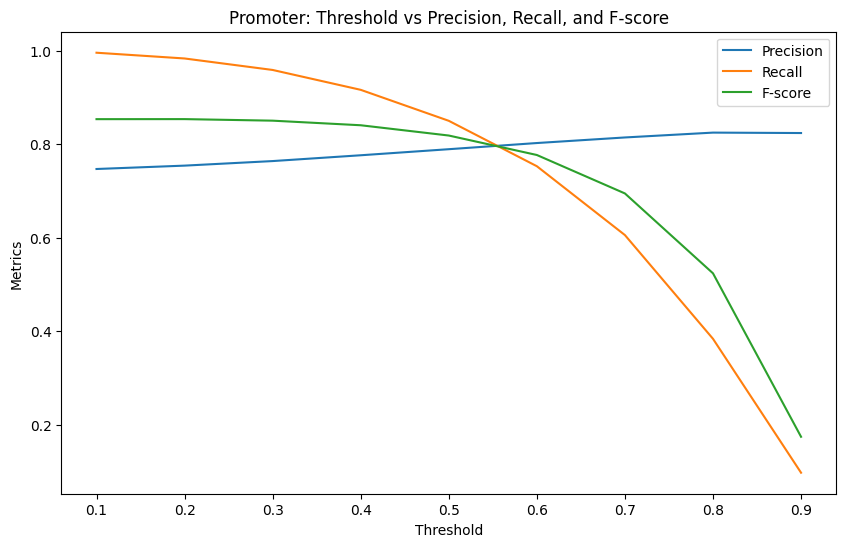

In [9]:
filename = os.path.join(base_directory,'3_results.csv') 
class_number = 3
plot_metrics_from_csv(filename, class_mapping, class_number)

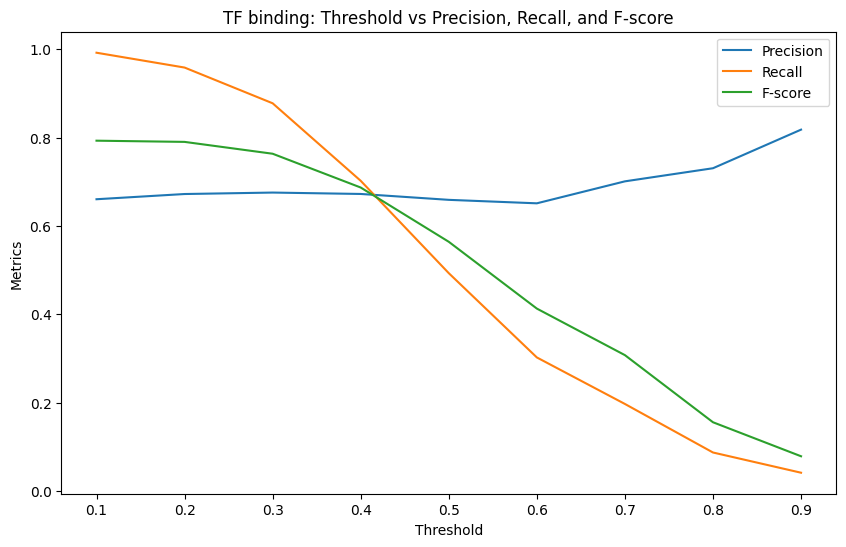

In [10]:
filename = os.path.join(base_directory,'4_results.csv') 
class_number = 4
plot_metrics_from_csv(filename, class_mapping, class_number)

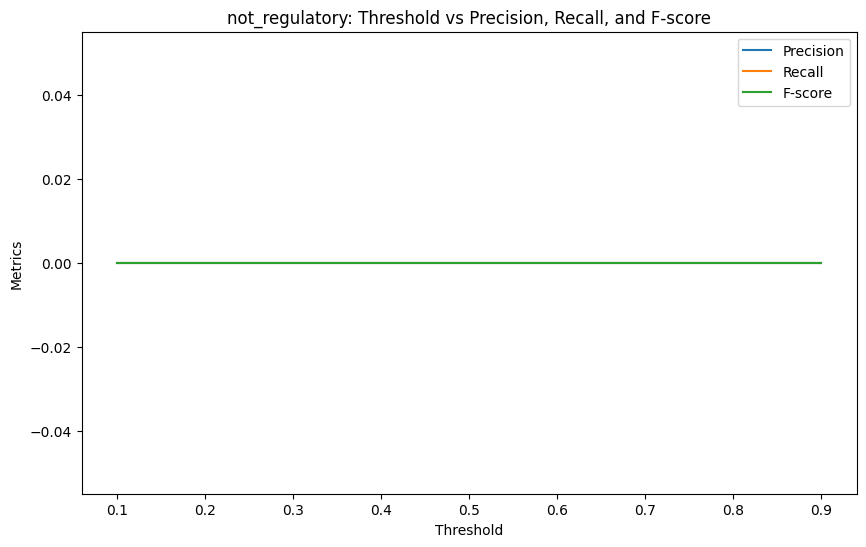

In [11]:
filename = os.path.join(base_directory,'5_results.csv') 
class_number = 5
plot_metrics_from_csv(filename, class_mapping, class_number)

In [15]:
!pip install plotly


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 11.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [116]:
import pandas as pd
import plotly.express as px

def plot_results_csv(filename, class_number):
    # Read the CSV file
    df = pd.read_csv(filename);

    # Extract columns for False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr = list(df['fp'] / (df['fp'] + df['tn']))
    tpr = list(df['tp'] / (df['tp'] + df['fn']))
    precision = list(df['precision'])
    recall = list(df['recall'])
    f_score = list(df['f_score'])

    # Create DataFrame with FPR and TPR at various thresholds
    thresholds = list(df['threshold'])
    performance_df = pd.DataFrame({
        'False Positive Rate': fpr,
        #'True Positive Rate': tpr,
        'Precision' : precision,
        'Recall' : recall,
        'Fscore' : f_score
    }, index=thresholds);
    
    
    title_class = next(key for key, value in class_mapping.items() if value == class_number)
    fig_thresh = px.line(
        performance_df,
        markers = True
    #    width=700, height=500
    )
    
    fig_thresh.update_layout(
    title = f'{title_class}: Precision, Recall, F_score, FPR at every threshold',
    xaxis_title= "Thresholds",
    yaxis_title= "Metrics",
    legend_title="Metrics",
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"))
        
        
      # Set index and column names
    performance_df.index.name = "Thresholds"
    performance_df.columns.name = "Rate"

    #fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
    #fig_thresh.update_xaxes(range=[0, 1], constrain='domain')
    fig_thresh.show()

  

    return 



In [119]:
filename = os.path.join(base_directory, '0_results.csv')
class_number = 0
plot_results_csv(filename, class_number)

In [117]:
filename = os.path.join(base_directory, '1_results.csv')
class_number = 1
plot_results_csv(filename, class_number)


In [118]:
filename = os.path.join(base_directory, '2_results.csv')
class_number = 2
plot_results_csv(filename, class_number)


In [120]:
filename = os.path.join(base_directory, '3_results.csv')
class_number = 3
plot_results_csv(filename, class_number)


In [112]:
filename = os.path.join(base_directory, '4_results.csv')
class_number = 4
plot_results_csv(filename, class_number)


In [113]:
filename = os.path.join(base_directory, '5_results.csv')
class_number = 5
plot_results_csv(filename, class_number)


In [114]:
import pandas as pd
import plotly.express as px

def plot_PRC(filename, class_number):
    # Read the CSV file
    df = pd.read_csv(filename);

    # Extract columns for False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr = list(df['fp'] / (df['fp'] + df['tn']))
    tpr = list(df['tp'] / (df['tp'] + df['fn']))
    precision = list(df['precision'])
    recall = list(df['recall'])
    f_score = list(df['f_score'])

    # Create DataFrame with FPR and TPR at various thresholds
    thresholds = list(df['threshold'])
    performance_df = pd.DataFrame({
        'False Positive Rate': fpr,
        'True Positive Rate': tpr,
        'Precision' : precision,
        'Recall' : recall,
        'Fscore' : f_score
    }, index=thresholds);
    
    
    title_class = next(key for key, value in class_mapping.items() if value == class_number)
    fig_thresh = px.line(performance_df,
        x = 'Recall',
        y = 'Precision', title=f'{title_class}: PRC Curve', markers = True
    #    width=700, height=500
    )

    #fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
    #fig_thresh.update_xaxes(range=[0, 1], constrain='domain')
    fig_thresh.show()

    # Set index and column names
    performance_df.index.name = "Thresholds"
    performance_df.columns.name = "Rate"

    return 



In [115]:
filename = os.path.join(base_directory, '1_results.csv')
class_number = 1
plot_PRC(filename, class_number)

In [72]:
filename = os.path.join(base_directory, '2_results.csv')
class_number = 2
plot_PRC(filename, class_number)

In [85]:
filename = os.path.join(base_directory, '3_results.csv')
class_number = 3
plot_PRC(filename, class_number)

In [86]:
filename = os.path.join(base_directory, '4_results.csv')
class_number = 4
plot_PRC(filename, class_number)

In [73]:
import pandas as pd
import plotly.express as px

def plot_ROC(filename, class_number):
    # Read the CSV file
    df = pd.read_csv(filename);

    # Extract columns for False Positive Rate (FPR) and True Positive Rate (TPR)
    fpr = list(df['fp'] / (df['fp'] + df['tn']))
    tpr = list(df['tp'] / (df['tp'] + df['fn']))
    precision = list(df['precision'])
    recall = list(df['recall'])
    f_score = list(df['f_score'])

    # Create DataFrame with FPR and TPR at various thresholds
    thresholds = list(df['threshold'])
    performance_df = pd.DataFrame({
        'False Positive Rate': fpr,
        'True Positive Rate': tpr,
        'Precision' : precision,
        'Recall' : recall,
        'Fscore' : f_score
    }, index=thresholds);
    
    
    title_class = next(key for key, value in class_mapping.items() if value == class_number)
    fig_thresh = px.line(performance_df,
        x = 'False Positive Rate',
        y = 'True Positive Rate', title=f'{title_class}: ROC Curve', markers = True
    #    width=700, height=500
    )

    #fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
    #fig_thresh.update_xaxes(range=[0, 1], constrain='domain')
    fig_thresh.show()

    # Set index and column names
    performance_df.index.name = "Thresholds"
    performance_df.columns.name = "Rate"

    return 



In [75]:
filename = os.path.join(base_directory, '1_results.csv')
class_number = 1
plot_ROC(filename, class_number)

In [76]:
filename = os.path.join(base_directory, '2_results.csv')
class_number = 2
plot_ROC(filename, class_number)

In [81]:
filename = os.path.join(base_directory, '3_results.csv')
class_number = 3
plot_ROC(filename, class_number)


In [82]:
filename = os.path.join(base_directory, '4_results.csv')
class_number = 4
plot_ROC(filename, class_number)


In [83]:
filename = os.path.join(base_directory, '5_results.csv')
class_number = 5
plot_ROC(filename, class_number)
